## Inspect results

In [3]:
b = '/Users/nicholassofroniew/Documents/DATA-proteins/proteins'

In [4]:
from pandas import read_csv
from os.path import join
import matplotlib.pyplot as plt
from glob import glob
from pandas import DataFrame
%matplotlib inline

In [7]:
results = read_csv(join(b,'models-lstm3D/model-0010','results.csv'))

In [8]:
results

,Unnamed: 0,bond_angle,rmse,torsion_angle
0,0,71.608334,25.602630,74.590964
1,1,71.357085,27.662082,74.703941
2,2,71.653271,28.750214,75.099470
3,3,71.307675,28.922919,74.802826
4,4,71.536439,28.321919,75.061659
5,5,71.963122,27.474960,72.283082
6,6,72.542855,24.057790,74.107453
7,7,71.604333,28.006237,74.517065
8,8,71.426506,29.826545,74.862795
9,9,69.051663,26.158730,79.978659


In [9]:
results.mean()

Unnamed: 0       609.500000
bond_angle        69.494512
rmse              29.779033
torsion_angle     84.292858
dtype: float64

In [10]:
train = read_csv(join(b,'models-lstm3D','train.csv'))
val =  read_csv(join(b,'models-lstm3D','val.csv'))

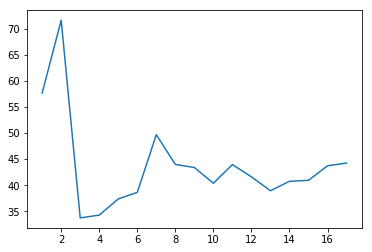

In [15]:
plt.plot(train.groupby('epoch').mean().loss);
plt.plot(val.groupby('epoch').mean().loss);

### look at ramachandran plots for predicted

In [ ]:
files = glob(join(b,'val','*.csv'))
dfVal = DataFrame([])
ind = 0
for f in files:
    df = read_csv(f)
    df['id'] = ind
    dfVal = dfVal.append(df)
    ind = ind + 1

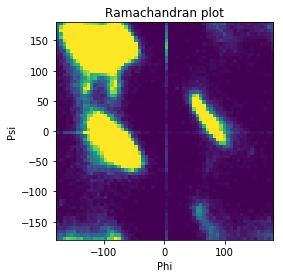

In [44]:
from numpy import histogram2d
heatmap, xedges, yedges = histogram2d(-dfVal.torsion_angle[2::3], dfVal.torsion_angle[1::3], bins=(64,64), range = [[-180, 180], [-180, 180]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = heatmap/heatmap.max() 
# Plot heatmap
plt.clf()
plt.title('Ramachandran plot')
plt.ylabel('Psi')
plt.xlabel('Phi')
plt.imshow(heatmap, extent=extent, clim=[0, .01])
plt.xlim([-180, 180])
plt.ylim([-180, 180])
plt.show()

In [ ]:
files = glob(join(b,'models-lstm3D/model-0010','predict*.csv'))
dfPred = DataFrame([])
ind = 0
for f in files:
    df = read_csv(f)
    df['id'] = ind
    dfPred = dfPred.append(df)
    ind = ind + 1

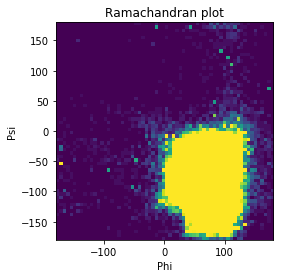

In [46]:
from numpy import histogram2d
heatmap, xedges, yedges = histogram2d(-dfPred.torsion_angle[2::3], dfPred.torsion_angle[1::3], bins=(64,64), range = [[-180, 180], [-180, 180]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = heatmap/heatmap.max() 
# Plot heatmap
plt.clf()
plt.title('Ramachandran plot')
plt.ylabel('Psi')
plt.xlabel('Phi')
plt.imshow(heatmap, extent=extent, clim=[0, .01])
plt.xlim([-180, 180])
plt.ylim([-180, 180])
plt.show()

## 3D plots

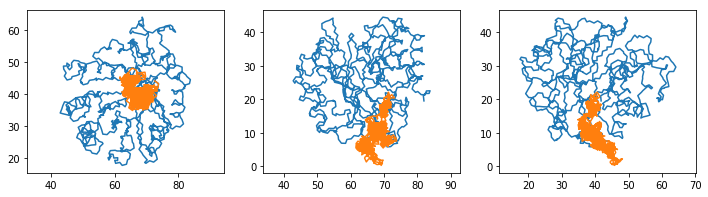

In [71]:
protein_id = 10

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.plot(dfVal[dfPred.id==protein_id].x, dfVal[dfPred.id==protein_id].y);
plt.plot(dfPred[dfPred.id==protein_id].x, dfPred[dfPred.id==protein_id].y);
plt.axis('equal')
plt.subplot(132)
plt.plot(dfVal[dfPred.id==protein_id].x, dfVal[dfPred.id==protein_id].z);
plt.plot(dfPred[dfPred.id==protein_id].x, dfPred[dfPred.id==protein_id].z);
plt.axis('equal')
plt.subplot(133)
plt.plot(dfVal[dfPred.id==protein_id].y, dfVal[dfPred.id==protein_id].z);
plt.plot(dfPred[dfPred.id==protein_id].y, dfPred[dfPred.id==protein_id].z);
plt.axis('equal');